In [29]:
import pandas as pd
import plotly.graph_objects as go
import re
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from itertools import combinations
from src.utils.helpers import clean_column_values
import ast

import warnings
warnings.filterwarnings('ignore')

In [30]:
DATA_FOLDER = "data/"

movies = pd.read_csv(DATA_FOLDER + "v1_movies_cleaned.csv")

for col in movies.columns:
    try:
        movies[col] = movies[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    except:
        pass
    
    print(col, type(movies[col][0]))

title <class 'str'>
languages <class 'list'>
countries <class 'list'>
genres <class 'list'>
keywords <class 'float'>
release_date <class 'str'>
plot_summary <class 'str'>
year_release_date <class 'numpy.int64'>
cold_war_side <class 'str'>
character_western_bloc_representation <class 'list'>
character_eastern_bloc_representation <class 'list'>
western_bloc_values <class 'list'>
eastern_bloc_values <class 'list'>
theme <class 'list'>


In [31]:
movies = movies[['cold_war_side', 'countries']]
movies

,cold_war_side,countries
0,Western,[United States of America]
1,Western,"[Germany, Italy]"
2,None,[Russia]
3,None,[Italy]
4,None,"[United States of America, Hungary]"
...,...,...
32434,Eastern,"[Russia, Germany]"
32435,None,"[United States of America, France]"
32436,None,[United States of America]
32437,Eastern,[Czech Republic]


In [32]:
movies["cold_war_side"].value_counts()

cold_war_side
None       25438
Western     3738
Eastern     3263
Name: count, dtype: int64

In [33]:
country_film_count = Counter()
collaboration_count = Counter()

for countries in movies['countries']:
    country_film_count.update(countries)
    for pair in combinations(countries, 2):
        collaboration_count[tuple(sorted(pair))] += 1

print(country_film_count)

#log_film_count = {country: np.log2(count) for country, count in country_film_count.items()}
#log_film_count = dict(sorted(log_film_count.items(), key=lambda x: x[1], reverse=True))
#log_film_count

root_film_count = {country: np.sqrt(count) for country, count in country_film_count.items()}
root_film_count = dict(sorted(root_film_count.items(), key=lambda x: x[1], reverse=True))
root_film_count

Counter({'United States of America': 12438, 'Russia': 8319, 'United Kingdom': 2947, 'France': 2158, 'Italy': 2146, 'India': 1895, 'Japan': 1139, 'Germany': 1093, 'Canada': 617, 'Hong Kong': 578, 'Spain': 545, 'Australia': 372, 'Sweden': 279, 'Mexico': 261, 'Ukraine': 200, 'Korea': 195, 'Poland': 173, 'Lithuania': 148, 'Denmark': 140, 'Netherlands': 133, 'Switzerland': 132, 'Argentina': 132, 'China': 131, 'Yugoslavia': 128, 'Belgium': 121, 'New Zealand': 118, 'Finland': 113, 'Czech Republic': 110, 'Hungary': 108, 'Greece': 107, 'Czechoslovakia': 100, 'Taiwan': 95, 'Brazil': 87, 'Austria': 87, 'Philippines': 85, 'Norway': 72, 'Estonia': 64, 'Ireland': 60, 'Israel': 59, 'Egypt': 58, 'Iran': 56, 'Turkey': 55, 'Croatia': 49, 'Portugal': 46, 'South Africa': 46, 'Latvia': 43, 'Serbia': 42, 'Romania': 39, 'Bulgaria': 38, 'Sri Lanka': 29, 'Georgia': 26, 'Cuba': 25, 'Thailand': 22, 'Pakistan': 20, 'Indonesia': 20, 'Malaysia': 19, 'Uzbekistan': 18, 'Bosnia and Herzegovina': 17, 'Singapore': 17, '

{'United States of America': 111.52578177264664,
 'Russia': 91.20855223058855,
 'United Kingdom': 54.286278192559855,
 'France': 46.45427859734774,
 'Italy': 46.32493928760188,
 'India': 43.53159771935783,
 'Japan': 33.74907406137241,
 'Germany': 33.06055050963308,
 'Canada': 24.839484696748443,
 'Hong Kong': 24.041630560342615,
 'Spain': 23.345235059857504,
 'Australia': 19.28730152198591,
 'Sweden': 16.703293088490067,
 'Mexico': 16.15549442140351,
 'Ukraine': 14.142135623730951,
 'Korea': 13.96424004376894,
 'Poland': 13.152946437965905,
 'Lithuania': 12.165525060596439,
 'Denmark': 11.832159566199232,
 'Netherlands': 11.532562594670797,
 'Switzerland': 11.489125293076057,
 'Argentina': 11.489125293076057,
 'China': 11.445523142259598,
 'Yugoslavia': 11.313708498984761,
 'Belgium': 11.0,
 'New Zealand': 10.862780491200215,
 'Finland': 10.63014581273465,
 'Czech Republic': 10.488088481701515,
 'Hungary': 10.392304845413264,
 'Greece': 10.344080432788601,
 'Czechoslovakia': 10.0,
 'Ta

In [34]:
# For all the countries
countries = list(country_film_count.keys())

In [35]:
# For the top 15 countries
countries = [country for country, count in country_film_count.most_common(15)]

In [36]:
country_cold_war_side = {}
for country in countries:
    sides = movies.loc[movies['countries'].apply(lambda x: country in x), 'cold_war_side'].values
    west_count = (sides == 'Western').sum()
    east_count = (sides == 'Eastern').sum()

    if west_count > east_count:
        country_cold_war_side[country] = 'Western'
    elif west_count < east_count:
        country_cold_war_side[country] = 'Eastern'
    else:
        country_cold_war_side[country] = None
        

In [37]:
collaboration_count = {k: v for k, v in collaboration_count.items() if k[0] in countries and k[1] in countries}

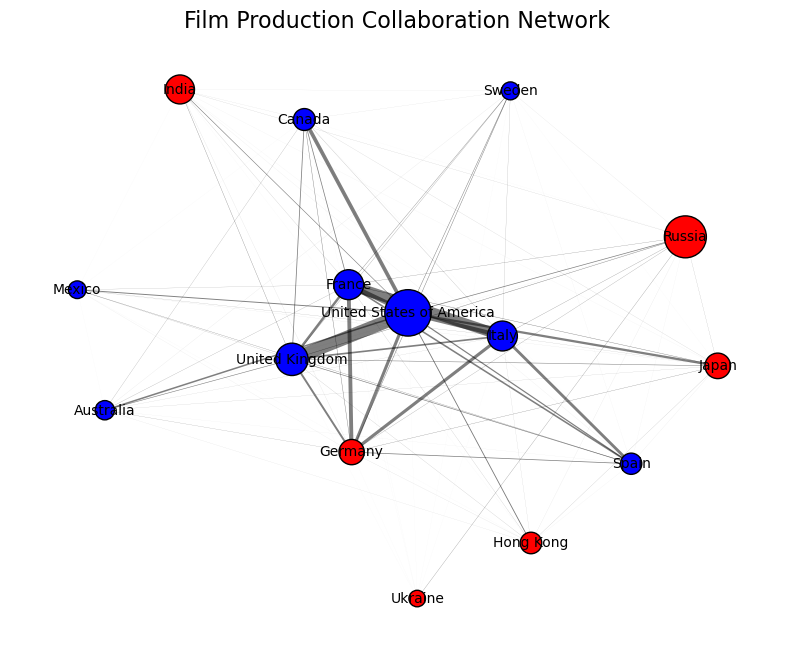

In [39]:
# With matplotlib
G = nx.Graph()
for country in countries:
    G.add_node(country, side=country_cold_war_side[country], size=root_film_count[country])

for (c1, c2), count in collaboration_count.items():
    G.add_edge(c1, c2, weight=count)

node_colors = [
    'blue' if G.nodes[n]['side'] == 'Western' else
    'red' if G.nodes[n]['side'] == 'Eastern' else 'grey'
    for n in G.nodes
]

node_sizes = [G.nodes[n]['size'] * 10 for n in G.nodes] 

edge_weights = [G[u][v]['weight'] for u, v in G.edges]
edge_widths = [weight * 0.01 for weight in edge_weights]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42, k=10)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=edge_widths)
nx.draw_networkx_nodes(
    G, pos, node_color=node_colors, edgecolors='black', node_size=node_sizes
)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.title("Film Production Collaboration Network", fontsize=16)
plt.axis('off')
plt.show()

In [41]:
# With plotly
G = nx.Graph()
for country in countries:
    G.add_node(country, side=country_cold_war_side[country], size=root_film_count[country])

for (c1, c2), count in collaboration_count.items():
    G.add_edge(c1, c2, weight=count)

pos = nx.spring_layout(G, seed=42, k=10, iterations=100)
edge_x = []
edge_y = []
edge_weights = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_weights.append(G[edge[0]][edge[1]]['weight'])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='black'),
    hoverinfo='none',
    mode='lines'
)

node_x = []
node_y = []
node_colors = []
node_sizes = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    if G.nodes[node]['side'] == 'Western':
        node_colors.append('blue')
    elif G.nodes[node]['side'] == 'Eastern':
        node_colors.append('red')
    else:
        node_colors.append('grey')
    node_sizes.append(G.nodes[node]['size'] * 0.5)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    hoverinfo='text',
    hovertext=[node for node in G.nodes()],
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=node_sizes,
        color=node_colors,
        colorbar=dict(
            thickness=15,
            title='Cold War Side',
            xanchor='left',
            titleside='right'
        )
    )
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Film Production Collaboration Network',
                    showlegend=False,
                    hovermode='closest',
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False),
                    plot_bgcolor='white'
                ))

fig.show()


In [42]:
country_coords = {
    'United States of America': (37.0902, -95.7129),
    'Italy': (41.8719, 12.5674),
    'Germany': (51.1657, 10.4515),
    'Russia': (61.5240, 105.3188),
    'Hungary': (47.1625, 19.5033),
    'Estonia': (58.5953, 25.0136),
    'Ukraine': (48.3794, 31.1656),
    'Switzerland': (46.8182, 8.2275),
    'Puerto Rico': (18.2208, -66.5901),
    'France': (46.6034, 1.8883),
    'Egypt': (26.8206, 30.8025),
    'Netherlands': (52.1326, 5.2913),
    'Japan': (36.2048, 138.2529),
    'United Kingdom': (55.3781, -3.4360),
    'Hong Kong': (22.3193, 114.1694),
    'India': (20.5937, 78.9629),
    'Spain': (40.4637, -3.7492),
    'Costa Rica': (9.7489, -83.7534),
    'Vietnam': (14.0583, 108.2772),
    'Taiwan': (23.6978, 120.9605),
    'Australia': (-25.2744, 133.7751),
    'Canada': (56.1304, -106.3468),
    'Latvia': (56.8796, 24.6032),
    'Brazil': (-14.2350, -51.9253),
    'Turkey': (38.9637, 35.2433),
    'Denmark': (56.2639, 9.5018),
    'Poland': (51.9194, 19.1451),
    'Korea': (35.9078, 127.7669),
    'Norway': (60.4720, 8.4689),
    'Croatia': (45.1, 15.2),
    'Bulgaria': (42.7339, 25.4858),
    'Austria': (47.5162, 14.5501),
    'Philippines': (12.8797, 121.7740),
    'Lithuania': (55.1694, 23.8813),
    'Portugal': (39.3999, -8.2245),
    'China': (35.8617, 104.1954),
    'Romania': (45.9432, 24.9668),
    'Georgia': (42.3154, 43.3569),
    'Yugoslavia': (44.0165, 21.0059),
    'New Zealand': (-40.9006, 174.8860),
    'Czechoslovakia': (49.8175, 15.4729),
    'Argentina': (-38.4161, -63.6167),
    'Greece': (39.0742, 21.8243),
    'South Africa': (-30.5595, 22.9375),
    'Luxembourg': (49.8153, 6.1296),
    'Sweden': (60.1282, 18.6435),
    'Ireland': (53.1424, -7.6921),
    'Colombia': (4.5709, -74.2973),
    'Uruguay': (-32.5228, -55.7658),
    'Belgium': (50.5039, 4.4699),
    'Czech Republic': (49.8175, 15.4729),
    'Bangladesh': (23.6850, 90.3563),
    'Tunisia': (33.8869, 9.5375),
    'Albania': (41.1533, 20.1683),
    'Finland': (61.9241, 25.7482),
    'Iceland': (64.9631, -19.0208),
    'Liechtenstein': (47.1660, 9.5554),
    'Mexico': (23.6345, -102.5528),
    'Iran': (32.4279, 53.6880),
    'Zimbabwe': (-19.0154, 29.1549),
    'Nepal': (28.3949, 84.1240),
    'Uzbekistan': (41.3775, 64.5853),
    'Venezuela': (6.4238, -66.5897),
    'Bosnia and Herzegovina': (43.9159, 17.6791),
    'Cuba': (21.5218, -77.7812),
    'Peru': (-9.1899, -75.0152),
    'Malaysia': (4.2105, 101.9758),
    'Pakistan': (30.3753, 69.3451),
    'Sri Lanka': (7.8731, 80.7718),
    'Algeria': (28.0339, 1.6596),
    'Israel': (31.0461, 34.8516),
    'Singapore': (1.3521, 103.8198),
    'Morocco': (31.7917, -7.0926),
    'Azerbaijan': (40.1431, 47.5769),
    'Bolivia': (-16.2902, -63.5887),
    'Cameroon': (7.3697, 12.3547),
    'Serbia': (44.0165, 21.0059),
    'Mali': (17.5707, -3.9962),
    'Macedonia': (41.6086, 21.7453),
    'Monaco': (43.7384, 7.4246),
    'Slovakia': (48.6690, 19.6990),
    'Senegal': (14.4974, -14.4524),
    'Qatar': (25.2760, 51.2148),
    'Thailand': (15.8700, 100.9925),
    "Côte d'Ivoire": (7.5399, -5.5471),
    'Belarus': (53.7098, 27.9534),
    'Armenia': (40.0691, 45.0382),
    'Chile': (-35.6751, -71.5430),
    'Cambodia': (12.5657, 104.9910),
    'Ghana': (7.9465, -1.0232),
    'Jamaica': (18.1096, -77.2975),
    'Slovenia': (46.1512, 14.9955),
    'Guinea': (9.9456, -9.6966),
    'Afghanistan': (33.9391, 67.7100),
    'Democratic Republic of the Congo': (-4.0383, 21.7587),
    'Indonesia': (-0.7893, 113.9213),
    'Montenegro': (42.7087, 19.3744),
    'Namibia': (-22.9576, 18.4904),
    'Moldova': (47.4116, 28.3699),
    'Panama': (8.5379, -80.7821),
    'Burkina Faso': (12.2383, -1.5616),
    'Aruba': (12.5211, -69.9683),
    'Ethiopia': (9.145, 40.4897),
    'Jordan': (30.5852, 36.2384),
    'Kazakhstan': (48.0196, 66.9237),
    'Nigeria': (9.0820, 8.6753),
    'Libya': (26.3351, 17.2283),
    'Congo': (-0.2280, 15.8277),
    'Turkmenistan': (38.9697, 59.5563),
    'Bhutan': (27.5142, 90.4336),
    'Kuwait': (29.3117, 47.4818),
    'Lebanon': (33.8547, 35.8623),
    'Guinea-Bissau': (11.8037, -15.1804),
    'Mauritania': (21.0079, -10.9408),
    'Angola': (-11.2027, 17.8739),
    'Burma': (21.9162, 95.9560),
    'Martinique': (14.6415, -61.0242),
    'Trinidad and Tobago': (10.6918, -61.2225),
    'Bahrain': (26.0667, 50.5577),
    'Syria': (34.8021, 38.9968),
    'Kyrgyzstan': (41.2044, 74.7661),
    'Botswana': (-22.3285, 24.6849),
    'Zambia': (-13.1339, 27.8493),
    'Bahamas': (25.0343, -77.3963),
    'Papua New Guinea': (-6.3149, 143.9555),
    'Ecuador': (-1.8312, -78.1834),
    'Palestinian Territory': (31.9522, 35.2332)
}


In [44]:
# Map country coordinates
node_lat = []
node_lon = []
node_sizes = []
node_colors = []
for country in countries:
    if country in country_coords:
        node_lat.append(country_coords[country][0])
        node_lon.append(country_coords[country][1])
        node_sizes.append(root_film_count[country] * 0.5)  
        # Assign color based on Cold War side
        node_colors.append(
            'blue' if country_cold_war_side.get(country) == 'Western' else
            'red' if country_cold_war_side.get(country) == 'Eastern' else
            'grey'
        )

# Prepare edges
edge_lat = []
edge_lon = []
for (c1, c2), weight in collaboration_count.items():
    if c1 in country_coords and c2 in country_coords:
        edge_lat.extend([country_coords[c1][0], country_coords[c2][0], None])
        edge_lon.extend([country_coords[c1][1], country_coords[c2][1], None])

# Create the map
fig = go.Figure()

# Add edges
fig.add_trace(go.Scattergeo(
    locationmode='ISO-3',
    lat=edge_lat,
    lon=edge_lon,
    mode='lines',
    line=dict(width=1, color='black'),
    hoverinfo='none'
))

# Add nodes
fig.add_trace(go.Scattergeo(
    locationmode='ISO-3',
    lat=node_lat,
    lon=node_lon,
    mode='markers',
    marker=dict(
        size=node_sizes,
        color=node_colors,
        line=dict(width=0.5, color='black')
    ),
    text=countries,
    hoverinfo='text'
))

# Mapbox configuration
fig.update_layout(
    title='Film Production Collaboration Network on a Map',
    showlegend=False,
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(217, 217, 217)',
        showcountries=True,
    )
)

# Show the map
fig.show()